In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris, make_classification, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures


Logistic Regression is a supervised learning algorithm used for classification problems and performs well on linearly seperable.

In [47]:
data = load_iris()
X = data.data
y = data.target


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [49]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [50]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


Achieves high accuracy on the Iris dataset because the classes are nearly linearly separable. 

Logistic Regression from scratch

In [51]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)


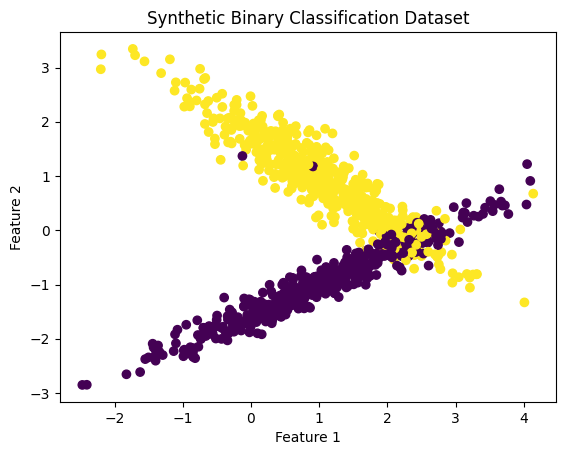

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Synthetic Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [53]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [54]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_scratch = LogisticRegressionScratch()
model_scratch.fit(X_train, y_train)

y_pred_scratch = model_scratch.predict(X_test)
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)

print(f"Scratch Model Accuracy: {accuracy_scratch * 100:.2f}%")


Scratch Model Accuracy: 90.00%


This implementation performs reasonably well but does not match sklearn's optimized implementation.

Hyperparameters tuning 

In [56]:
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs')
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.9


In [57]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)


Best parameters: {'C': 10, 'penalty': 'l1'}


In [58]:
best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Best Model Accuracy: {accuracy_best * 100:.2f}%")


Best Model Accuracy: 90.00%


GridSearchCV helps identify optimal hyperparameters and improves model generalization.

Logistic regression on Non Linear data

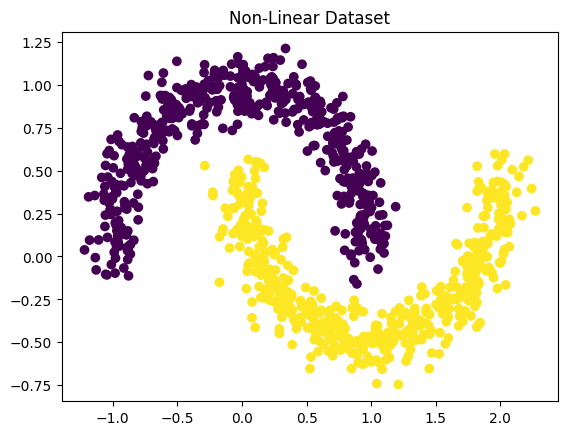

In [59]:
#Generate dataset(Moons)
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Non-Linear Dataset")
plt.show()


In [60]:
#apply logistic regression 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_nonlinear = LogisticRegression()
model_nonlinear.fit(X_train, y_train)

accuracy_nonlinear = accuracy_score(y_test, model_nonlinear.predict(X_test))
accuracy_nonlinear


0.88

In [61]:
# Polynomial Feature transformation
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


In [62]:
#Logistic regression with polynomial features 
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

model_poly = LogisticRegression(max_iter=1000)
model_poly.fit(X_train, y_train)

accuracy_poly = accuracy_score(y_test, model_poly.predict(X_test))
accuracy_poly

# Polynomial features transform non-linear data into a higher-dimensional space, which allows Logistic Regression to achieve better performance.


0.99

Logistic regression without feature engineering 

In [63]:
#Plot decision boundary with non linear data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_linear = LogisticRegression()
model_linear.fit(X_train, y_train)

accuracy_linear = accuracy_score(y_test, model_linear.predict(X_test))
accuracy_linear

0.88

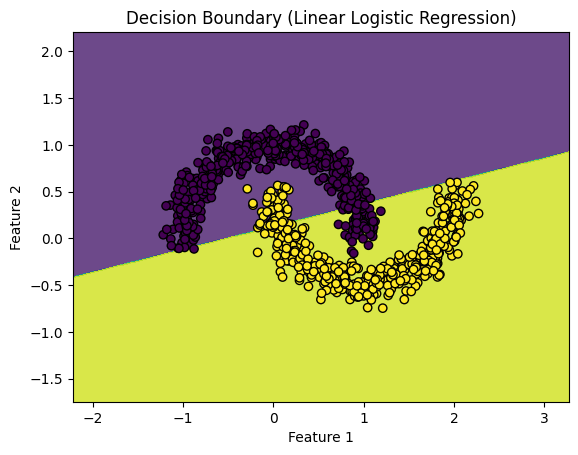

In [64]:
# mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

Z = model_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.title("Decision Boundary (Linear Logistic Regression)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


After applying feature engineering

In [65]:
# define grid boundaries 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


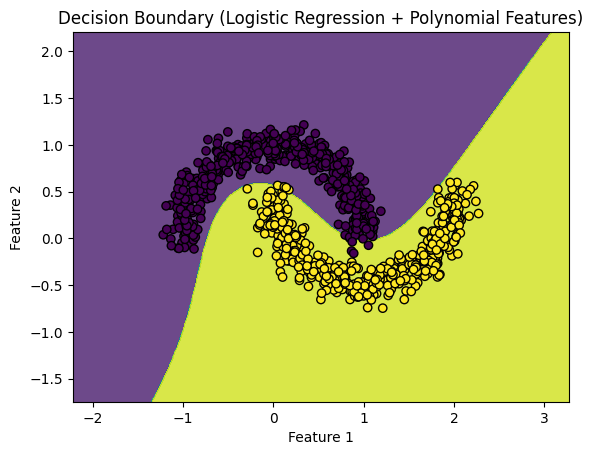

In [66]:
# create grid again
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

# apply same feature engineering to grid
grid_poly = poly.transform(np.c_[xx.ravel(), yy.ravel()])

Z_poly = model_poly.predict(grid_poly)
Z_poly = Z_poly.reshape(xx.shape)

plt.contourf(xx, yy, Z_poly, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.title("Decision Boundary (Logistic Regression + Polynomial Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
